In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from softpy.fuzzy.fuzzy_operation import *
from softpy.fuzzy.operations import *
from softpy.fuzzy.fuzzyset import *
from softpy.fuzzy.memberships_function import *

# Discrete Fuzzy Sets

In [2]:
oranges = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.5, 1.0])

They support taking the degree of membership of an element through the __call__ operator (i.e., functional notation: set_name(element)).

They also support directly taking an alpha cut through the __getitem__ operator (i.e., indexing notation: set_name[alpha])

In [3]:
print(oranges("apple"))
oranges[0.2]

0.0


array(['lemon', 'oxanthera', 'orange'], dtype='<U9')

In [4]:
try:
    oranges[-0.1]
except ValueError as v:
    print(v)

Alpha should be in [0,1], is -0.1


Elements and corresponding memberships are internally stored in set_name.items and set_name.memberships

<BarContainer object of 4 artists>

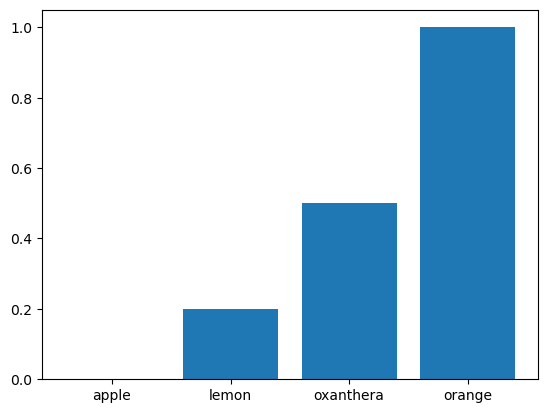

In [5]:
plt.bar(oranges.items, oranges.memberships)

By default, DiscreteFuzzySet instances are dynamic: querying for an object not in the fuzzy set dynamically adds it with degree of membership equal to 0

In [6]:
try:
    print(oranges("pear"))
except ValueError as v:
    print(v)

0.0


In [7]:
oranges2 = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.5, 1.0])

oranges == oranges2

True

But can also be defined as non-dynamic through the *dynamic* constructor argument: in this case, querying for an element not in the set raises an Exception

In [8]:
oranges_nodynamic = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.5, 1.0], dynamic=False)

oranges == oranges_nodynamic

False

In [9]:
lemons = DiscreteFuzzySet(["apple", "lemon", "oxanthera", "orange", "bergamot"], [0.0, 1.0, 0.2, 0.3, 0.45])

lemons == oranges

False

In [10]:
oranges3 = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.3, 1.0])

oranges == oranges3

False

The class also implements several ways to compute the uncertainty (fuzziness, hartley measure)

In [11]:
oranges.fuzziness()

1.7219280948873623

In [12]:
oranges.hartley()

0.6169925001442312

# Operations (Discrete)

Operators between fuzzy sets are internally implemented as sub-classes of **FuzzyCombination**, which allows for dynamic and efficient handling of general combination operators.

For the case of DiscreteFuzzySet, this is implemented mainly through the **DiscreteFuzzyCombination** class, which basically constructs a new DiscreteFuzzySet
by combining the membership values according to a pre-specified operator. DiscreteFuzzyCombination *inherits both from* **FuzzyCombination** and **DiscreteFuzzySet**: this enables treating a DiscreteFuzzyCombination as any DiscreteFuzzySet, which is *especially important for composing operators*.

For practical usage, this is realized by defining functions that take two DiscreteFuzzySet instances and return a DiscreteFuzzyCombination instance
by specifying a function to be used for aggregating: e.g., the **maximum** function creates a DiscreteFuzzyCombination where the operator is **numpy.maximum**

In [13]:
max_t = DiscreteFuzzyCombination([oranges, lemons],op= maximum)
max_t("orange")

1.0

In [14]:
max_t[0.5]

array(['lemon', 'orange', 'oxanthera'], dtype='<U9')

<BarContainer object of 6 artists>

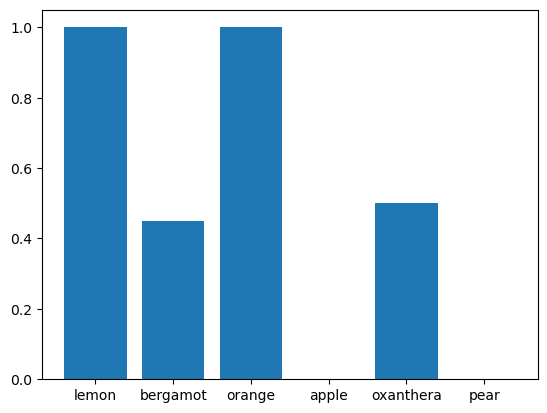

In [15]:
plt.bar(max_t.items, max_t.memberships)

In [16]:
min_t = DiscreteFuzzyCombination([oranges, lemons], minimum)
min_t("orange")

0.3

In [17]:
min_t[0.2]

array(['lemon', 'orange', 'oxanthera'], dtype='<U9')

(0.0, 1.0)

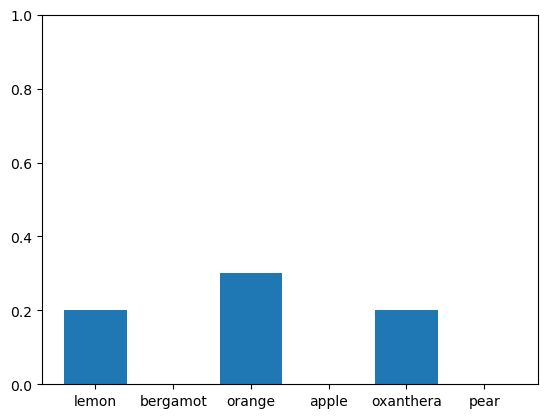

In [18]:
plt.bar(min_t.items, min_t.memberships)
plt.ylim(0,1)

In [19]:
prod_t = DiscreteFuzzyCombination([oranges, lemons], op=product)

prod_t('orange')


0.3

In [20]:
prod_t[0.2]

array(['lemon', 'orange'], dtype='<U9')

(0.0, 1.0)

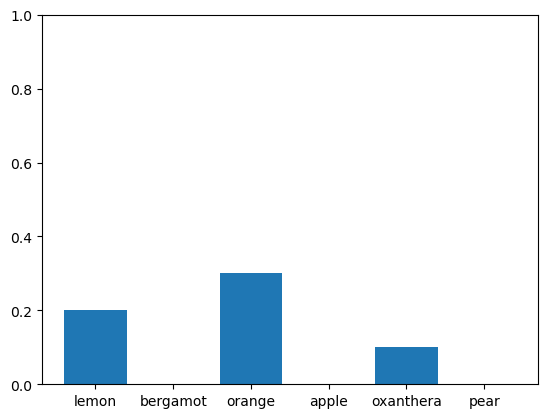

In [21]:
plt.bar(prod_t.items, prod_t.memberships)
plt.ylim(0,1)

OWA (order weighted average) are an exception in that they are not implemented as a sub-class of FuzzyCombination but rather as a direct sub-class of **DiscreteFuzzySet**, namely **DiscreteFuzzyOWA**.

An OWA operator is essentially a form of weighted average in which the weightes are associated not to elements but rather to elements' *ranks*. Thus, let $w_1, \ldots, w_n$ be a set of weights, and $F_1, \ldots, F_n$ be a collection of fuzzy sets. For each element $x$, $OWA(F_1, \ldots, F_n, \{w_1, \ldots w_n\})[x])$ is defined as:

$$OWA(F_1, \ldots, F_n, \{w_1, \ldots w_n\})[x]) = \sum_{i=1}^n w_i F_{(i)}(x),$$

where $F_{(1)}(x), \ldots, F_{(n)}(x)$ is the ordering of $F_1, \ldots, F_n$ in decreasing membership value for element $x$.

The reason for implementing the OWA operators as specialized classes stems from the fact that the logic for the OWA operator is more complicated and it is naturally defined as an n-ary operator (for any n) where weights are pre-specified

In [22]:
owa = DiscreteFuzzyWA([oranges, oranges_nodynamic, lemons], [0.25, 0.5, 0.25], order = True)
owa('orange')

0.825

In [23]:
owa[0.2]

array(['lemon', 'oxanthera', 'orange'], dtype='<U9')

(0.0, 1.0)

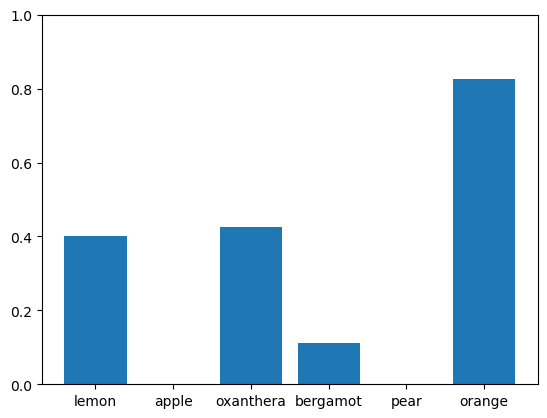

In [24]:
plt.bar(owa.items, owa.memberships)
plt.ylim(0,1)

# Continuous Fuzzy Sets

Continuous fuzzy sets describe a class of fuzzy sets whose elements belong to the $\mathbb{R}$ set (or some other non-enumerable set). Internally, continuous fuzzy sets are implemented as sub-classes of the **ContinuousFuzzySet** class.

Their implementation is generally more complex than DiscreteFuzzySet, and indeed they are an **abstract class** (you cannot directly define a ContinuousFuzzySet): concrete classes are defined for relevant sub-classes of continuous fuzzy sets.

The simpler example is the **FuzzyNumber** class: a fuzzy number is a generalization of a real number, in which alpha-cuts are closed, bounded, convex sets (i.e., intervals). The softpy library provides by default several types of FuzzyNumber sub-classes.

In [25]:
f = TriangularFuzzySet(0, 5, 10)

(0.0, 1.1)

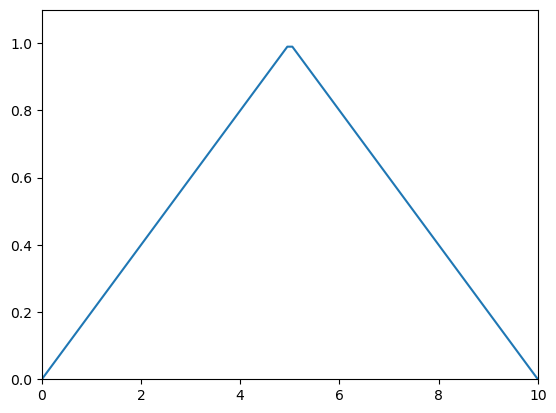

In [26]:
xs = np.linspace(0, 10, 100)
ys = [f(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(0,10)
plt.ylim(0,1.1)

Instances of **ContinuousFuzzySet** sub-classes also implement the **__getitem__** (for alpha-cuts) and **__call__** (for taking membership values)**. However, they either depend on having a closed-form analytical formulation for the fuzzy set (this is true for **FuzzyNumber** sub-classes), or use numerical approximation schemes (e.g., for general instances of **ContinuousFuzzySet**, taking alpha-cuts is implemented in terms of a grid search with grid-size = $\epsilon$, which is a parameter specified when creating an object.

[nan nan nan ... nan nan nan]


(0.0, 1.1)

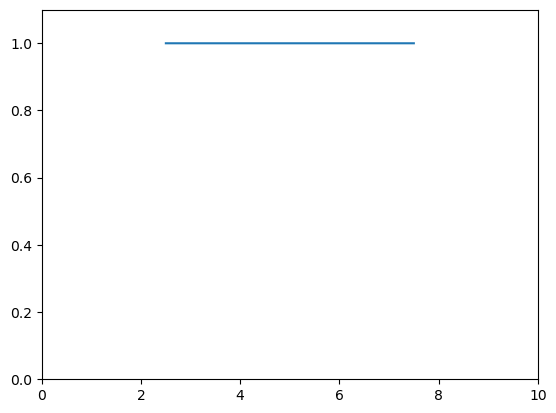

In [27]:
vals = f[0.5]
print(vals)
plt.plot(vals, np.ones(len(vals)))
plt.xlim(0,10)
plt.ylim(0,1.1)

In [28]:
f.fuzziness()

5.0

In [29]:
f.hartley()

2.321928094887362

# Operations (Continuous)

As for the implementation of continuous fuzzy sets, also the implementation of operations on them is more complex than for discrete fuzzy sets. The reason for this is that, even though we may want to combine two sets from a particularly simples class (e.g., **TriangularFuzzyNumber**), their combination may not belong to the same class.

Generally speaking, combination operators for continuous fuzzy sets are implemented according to a similar logic for discrete fuzzy sets, by defining functions that create sub-classes of **ContinuousFuzzyOperation** or **ContinuousFuzzyOWA**.

However, **ContinuousFuzzyOperation** does not directly create a fuzzy set object, but rather membership values are computed just-in-time, when querying for specific objects: the reason for this is that the result of a combination operation may not have a closed-form formulation (especially so when we concatenate multiple operations in a row).


(0.0, 1.05)

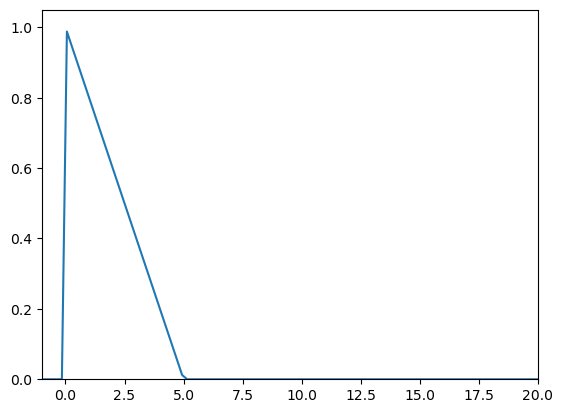

In [30]:
g = LinearZFuzzySet(0, 5, bound=(0,12))
xs = np.linspace(-1, 20, 100)
ys = [g(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,20)
plt.ylim(0,1.05)

In [31]:
hmax = ContinuousFuzzyCombination([f,g], op=maximum)

(0.0, 1.05)

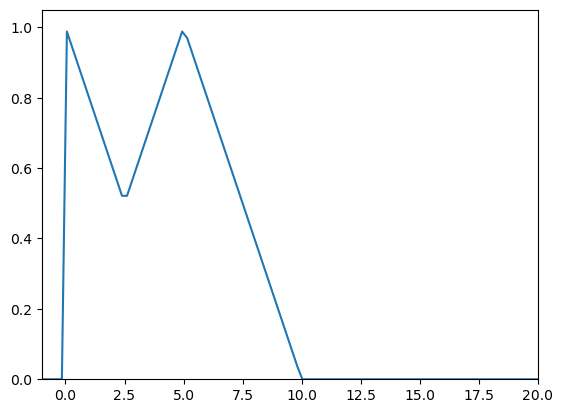

In [32]:
xs = np.linspace(-1, 20, 100)
ys = [hmax(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,20)
plt.ylim(0,1.05)

(0.0, 1.1)

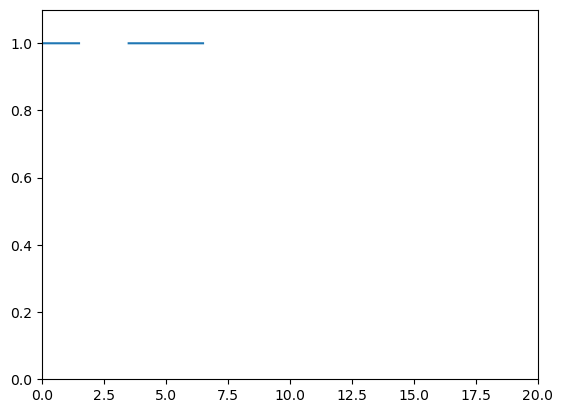

In [33]:
vals = hmax[0.7]
plt.plot(vals, np.ones(len(vals)))
plt.xlim(0,20)
plt.ylim(0,1.1)

In [34]:
hmin = ContinuousFuzzyCombination([f,g], minimum)

(0.0, 1.0)

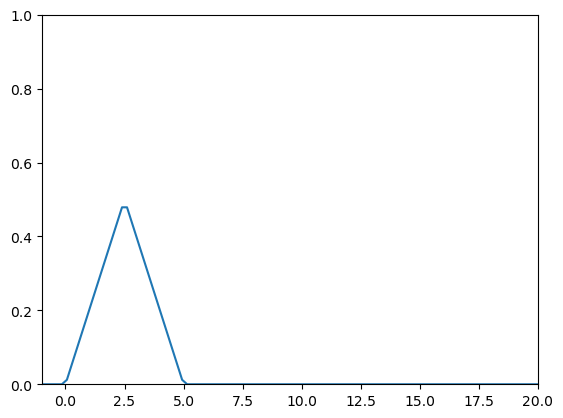

In [35]:
xs = np.linspace(-1, 20, 100)
ys = [hmin(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,20)
plt.ylim(0,1)

(0.0, 1.1)

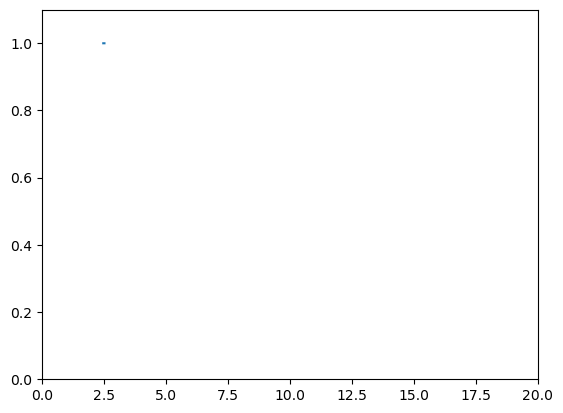

In [36]:
vals = hmin[0.495]
plt.plot(vals, np.ones(len(vals)))
plt.xlim(0,20)
plt.ylim(0,1.1)

(0.0, 1.05)

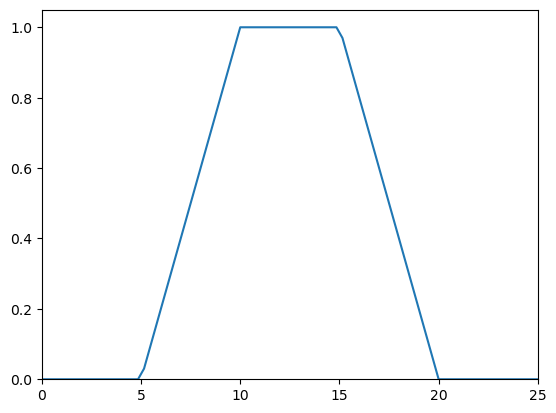

In [37]:
h = TrapezoidalFuzzySet(5, 10, 15, 20)
xs = np.linspace(0, 30, 100)
ys = [h(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(0,25)
plt.ylim(0,1.05)

In [38]:
owa_c = ContinuousFuzzyWA([f,g,h], [0.05, 0.05, 0.9], order=True)

(0.0, 1.0)

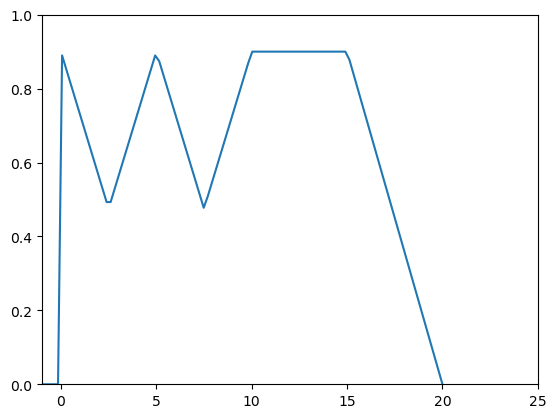

In [39]:
xs = np.linspace(-1, 20, 100)
ys = [owa_c(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,25)
plt.ylim(0,1)

(0.0, 1.1)

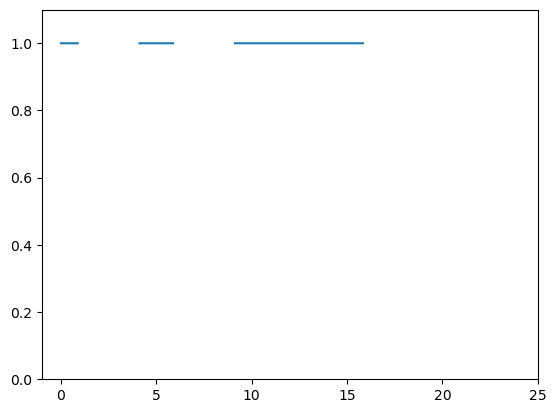

In [40]:
vals = owa_c[0.75]

plt.plot(vals, np.ones(len(vals)))
plt.xlim(-1,25)
plt.ylim(0,1.1)